In [24]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import colorConverter, ListedColormap
from matplotlib import cm

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
blue = np.array(colorConverter.to_rgba("mediumblue"))
red = np.array(colorConverter.to_rgba("tomato"))
newcolors[:128, :] = blue
newcolors[128:, :] = red
moc_cmp = ListedColormap(newcolors)

/tmp/ipykernel_31260/2266877798.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 256)


In [31]:
data_path = "/mnt/g/My Drive/GTC/ecco_data_minimal"
infile = open(f"{data_path}/southern_ocean_moc_density.pickle", "rb")
moc = pickle.load(infile); infile.close()
moc = np.flip(moc, axis=0)
lats = np.arange(-29.5, -89.75, -0.5)

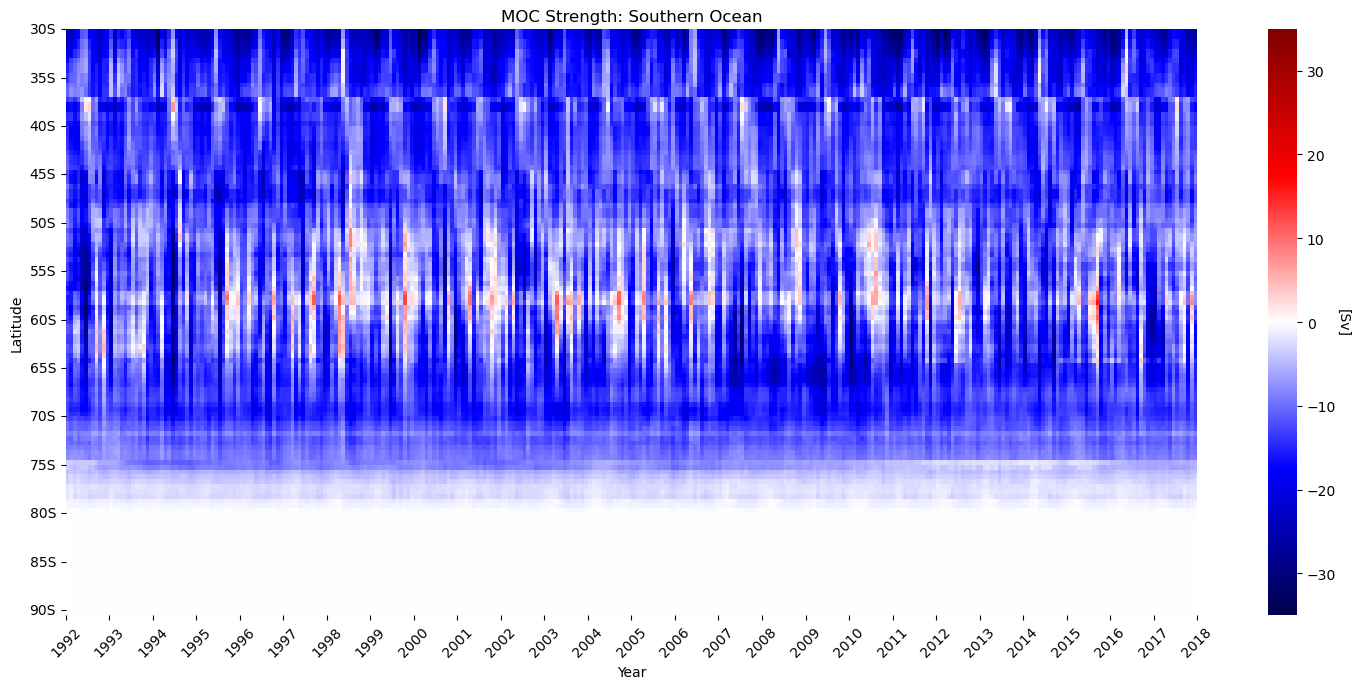

In [32]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)
limit = abs(moc).max()
ax = sns.heatmap(moc, cmap="seismic", cbar=True, vmin=-limit, vmax=limit)
ax.set_xlabel("Year"); ax.set_ylabel("Latitude")
ax.set_title("MOC Strength: Southern Ocean")
yticklabels = [f"{int(abs(x))+1}S" for x in np.arange(-29.5, -89.75, -5)]
ax.set_yticks(np.arange(0, len(lats), 10), yticklabels)
ax.set_xticks(np.arange(0, moc.shape[1]+12, 12), np.arange(1992, 2019))
ax.xaxis.set_tick_params(rotation=45)
cbar = ax.collections[0].colorbar
cbar.set_label("[Sv]", rotation=270, labelpad=10)
plt.tight_layout()
plt.show()